# K-Nearest Neighbors

This notebook shows the K-nearest neighbors model for spambase data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [3]:
df = pd.read_csv("spambase.csv")

In [4]:
df.shape

(4601, 58)

In [5]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))

scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


### Modelling

1. Split dataset into training and test set

In [30]:
from sklearn.model_selection import train_test_split

# X = df.drop('class', axis=1)
X = scaled_features
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
# Set up timer
t = Timer()

## KNN

Train a basic KNN with k = 5

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
knn_base = KNeighborsClassifier(n_neighbors=3)
knn_base.fit(X_train, y_train)
y_pred_knn_base_train = knn_base.predict(X_train)
y_pred_knn_base_test = knn_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_knn_base_train)
precision_train = precision_score(y_train, y_pred_knn_base_train)
recall_train = recall_score(y_train, y_pred_knn_base_train)
f1_train = f1_score(y_train, y_pred_knn_base_train)
roc_train = roc_auc_score(y_train, y_pred_knn_base_train)

accuracy_test = accuracy_score(y_test, y_pred_knn_base_test)
precision_test = precision_score(y_test, y_pred_knn_base_test)
recall_test = recall_score(y_test, y_pred_knn_base_test)
f1_test = f1_score(y_test, y_pred_knn_base_test)
roc_test = roc_auc_score(y_test, y_pred_knn_base_test)

print(f"Train Accuracy of Base KNN: {accuracy_train:.3f}")
print(f"Train Precision of Base KNN: {precision_train:.3f}")
print(f"Train Recall of Base KNN: {recall_train:.3f}")
print(f"Train F1 of Base KNN: {f1_train:.3f}")
print(f"Train ROC of Base KNN: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Base KNN: {accuracy_test:.3f}")
print(f"Test Precision of Base KNN: {precision_test:.3f}")
print(f"Test Recall of Base KNN: {recall_test:.3f}")
print(f"Test F1 of Base KNN: {f1_test:.3f}")
print(f"Test ROC of Base KNN: {roc_test:.3f}")

Elapsed time: 0.2161 seconds
Train Accuracy of Base KNN: 0.943
Train Precision of Base KNN: 0.929
Train Recall of Base KNN: 0.921
Train F1 of Base KNN: 0.925
Train ROC of Base KNN: 0.939
---
Test Accuracy of Base KNN: 0.895
Test Precision of Base KNN: 0.887
Test Recall of Base KNN: 0.858
Test F1 of Base KNN: 0.872
Test ROC of Base KNN: 0.890


Use Cross Validation

In [53]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
knn_base_res = cross_validate(
      estimator=knn_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.6056 seconds


In [54]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(knn_base_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(knn_base_res[m]):.3f}")

train_accuracy: 0.942
train_precision: 0.931
train_recall: 0.916
train_f1: 0.923
----
test_accuracy: 0.898
test_precision: 0.880
test_recall: 0.849
test_f1: 0.864


Plot training curve of Base KNN

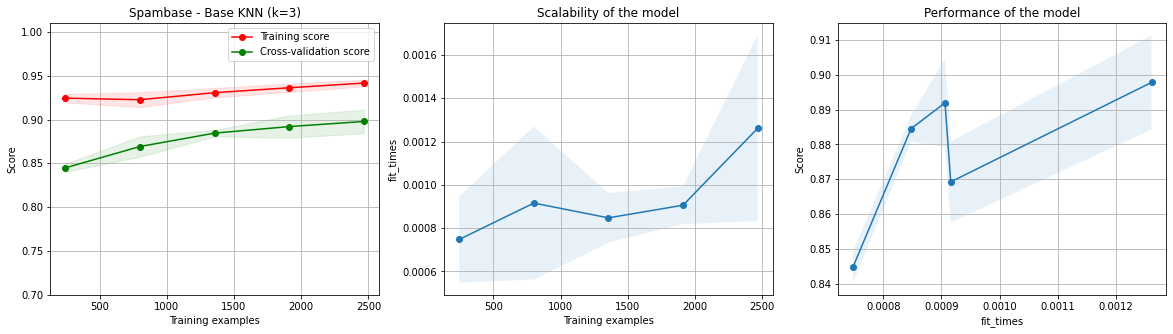

In [56]:
title = "Spambase - Base KNN (k=3)"
plot_learning_curve(
    knn_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [57]:
y_pred_knn_base_train = cross_val_predict(knn_base, X_train, y_train, cv=5)
y_pred_knn_base_test = cross_val_predict(knn_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_knn_base_train)
precision_train = precision_score(y_train, y_pred_knn_base_train)
recall_train = recall_score(y_train, y_pred_knn_base_train)
f1_train = f1_score(y_train, y_pred_knn_base_train)
roc_train = roc_auc_score(y_train, y_pred_knn_base_train)

accuracy_test = accuracy_score(y_test, y_pred_knn_base_test)
precision_test = precision_score(y_test, y_pred_knn_base_test)
recall_test = recall_score(y_test, y_pred_knn_base_test)
f1_test = f1_score(y_test, y_pred_knn_base_test)
roc_test = roc_auc_score(y_test, y_pred_knn_base_test)

print(f"Train Accuracy of Base KNN: {accuracy_train:.3f}")
print(f"Train Precision of Base KNN: {precision_train:.3f}")
print(f"Train Recall of Base KNN: {recall_train:.3f}")
print(f"Train F1 of Base KNN: {f1_train:.3f}")
print(f"Train ROC of Base KNN: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Base KNN: {accuracy_test:.3f}")
print(f"Test Precision of Base KNN: {precision_test:.3f}")
print(f"Test Recall of Base KNN: {recall_test:.3f}")
print(f"Test F1 of Base KNN: {f1_test:.3f}")
print(f"Test ROC of Base KNN: {roc_test:.3f}")

Train Accuracy of Base KNN: 0.898
Train Precision of Base KNN: 0.880
Train Recall of Base KNN: 0.849
Train F1 of Base KNN: 0.864
Train ROC of Base KNN: 0.889
---
Test Accuracy of Base KNN: 0.886
Test Precision of Base KNN: 0.880
Test Recall of Base KNN: 0.842
Test F1 of Base KNN: 0.860
Test ROC of Base KNN: 0.880


Determine best K for Knn

In [58]:
hp_scores = {}
for p in [1,2]:
    for k in range(1,45):
        hp_scores[f"{p},{k}"] = {}
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train,y_train)
        y_pred_knn_train = knn.predict(X_train)
        y_pred_knn_test = knn.predict(X_test)

        train_acc = accuracy_score(y_train, y_pred_knn_train)
        train_precision = precision_score(y_train, y_pred_knn_train)
        train_recall = recall_score(y_train, y_pred_knn_train)
        train_f1 = f1_score(y_train, y_pred_knn_train)
        train_roc_auc = roc_auc_score(y_train, y_pred_knn_train)
        train_error_rate = np.mean(y_pred_knn_train != y_train)

        test_acc = accuracy_score(y_test, y_pred_knn_test)
        test_precision = precision_score(y_test, y_pred_knn_test)
        test_recall = recall_score(y_test, y_pred_knn_test)
        test_f1 = f1_score(y_test, y_pred_knn_test)
        test_roc_auc = roc_auc_score(y_test, y_pred_knn_test)
        test_error_rate = np.mean(y_pred_knn_test != y_test)

        hp_scores[f"{p},{k}"]["train_acc"] = train_acc
        hp_scores[f"{p},{k}"]["train_precision"] = train_precision
        hp_scores[f"{p},{k}"]["train_recall"] = train_recall
        hp_scores[f"{p},{k}"]["train_f1"] = train_f1
        hp_scores[f"{p},{k}"]["train_roc_auc"] = train_roc_auc
        hp_scores[f"{p},{k}"]["train_error_rate"] = train_error_rate

        hp_scores[f"{p},{k}"]["test_acc"] = test_acc
        hp_scores[f"{p},{k}"]["test_precision"] = test_precision
        hp_scores[f"{p},{k}"]["test_recall"] = test_recall
        hp_scores[f"{p},{k}"]["test_f1"] = test_f1
        hp_scores[f"{p},{k}"]["test_roc_auc"] = test_roc_auc
        hp_scores[f"{p},{k}"]["test_error_rate"] = test_error_rate

In [59]:
hp_scores_df = pd.DataFrame(hp_scores)

In [60]:
hp_scores_df.idxmin(axis=1)

train_acc           1,44
train_precision     2,27
train_recall        1,44
train_f1            1,44
train_roc_auc       1,44
train_error_rate     1,1
test_acc            1,44
test_precision       2,1
test_recall         1,44
test_f1             1,44
test_roc_auc        1,44
test_error_rate      2,7
dtype: object

In [61]:
hp_scores_df.idxmax(axis=1)

train_acc            1,1
train_precision      1,1
train_recall         1,1
train_f1             1,1
train_roc_auc        1,1
train_error_rate    1,44
test_acc             2,7
test_precision      1,20
test_recall          2,1
test_f1              2,7
test_roc_auc         2,7
test_error_rate     1,44
dtype: object

In [62]:
p1_columns = [c for c in hp_scores_df.columns if c.startswith("1,")]
p2_columns = [c for c in hp_scores_df.columns if c.startswith("2,")]

p1_roc_scores_test = hp_scores_df.loc["test_roc_auc", p1_columns]
p2_roc_scores_test = hp_scores_df.loc["test_roc_auc", p2_columns]

p1_error_scores_test = hp_scores_df.loc["test_error_rate", p1_columns]
p2_error_scores_test = hp_scores_df.loc["test_error_rate", p2_columns]

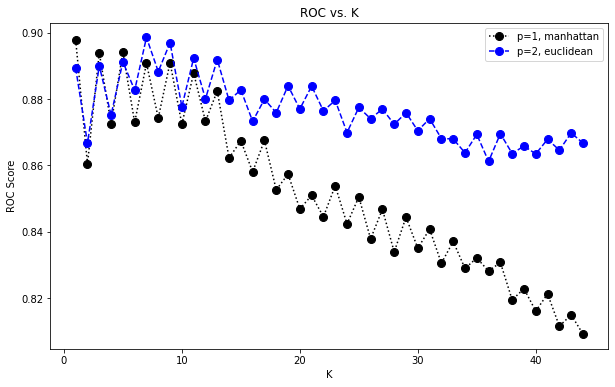

In [63]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1,45),
    p1_roc_scores_test,
    color='black', 
    linestyle='dotted', 
    marker='o',
    markerfacecolor='black', 
    markersize=8,
    label="p=1, manhattan"
)
plt.plot(
    range(1,45),
    p2_roc_scores_test,
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='blue', 
    markersize=8,
    label="p=2, euclidean"
)
plt.title('ROC vs. K')
plt.xlabel('K')
plt.ylabel('ROC Score')
plt.legend()

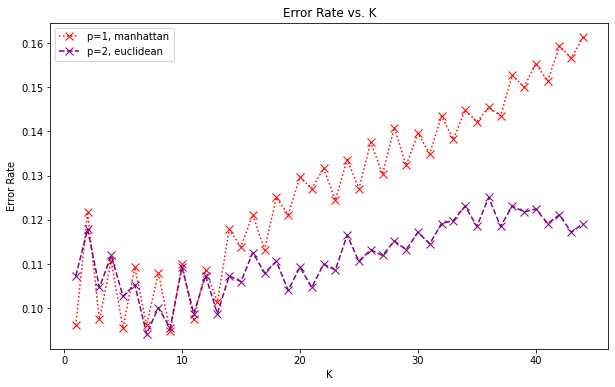

In [64]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1,45),
    p1_error_scores_test,
    color='red', 
    linestyle='dotted', 
    marker='x',
    markerfacecolor='orange', 
    markersize=8,
    label="p=1, manhattan"
)
plt.plot(
    range(1,45),
    p2_error_scores_test,
    color='purple', 
    linestyle='dashed', 
    marker='x',
    markerfacecolor='orange', 
    markersize=8,
    label="p=2, euclidean"
)

plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

Train with best k and best p

The best k is determined around k=1, with p=1

In [65]:
k=7
p=2

t.start()
knn_adv = KNeighborsClassifier(n_neighbors=k, p=p)
knn_adv.fit(X_train, y_train)
y_pred_knn_adv_train = knn_adv.predict(X_train)
y_pred_knn_adv_test = knn_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_knn_adv_train)
precision_train = precision_score(y_train, y_pred_knn_adv_train)
recall_train = recall_score(y_train, y_pred_knn_adv_train)
f1_train = f1_score(y_train, y_pred_knn_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_knn_adv_train)


accuracy_test = accuracy_score(y_test, y_pred_knn_adv_test)
precision_test = precision_score(y_test, y_pred_knn_adv_test)
recall_test = recall_score(y_test, y_pred_knn_adv_test)
f1_test = f1_score(y_test, y_pred_knn_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_knn_adv_test)


print(f"Train Accuracy of Adv KNN k={k}, p={p}: {accuracy_train:.3f}")
print(f"Train Precision of Adv KNN k={k}, p={p}: {precision_train:.3f}")
print(f"Train Recall of Adv KNN k={k}, p={p}: {recall_train:.3f}")
print(f"Train F1 of Adv KNN k={k}, p={p}: {f1_train:.3f}")
print(f"Train ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Adv KNN k={k}, p={p}: {accuracy_test:.3f}")
print(f"Test Precision of Adv KNN k={k}, p={p}: {precision_test:.3f}")
print(f"Test Recall of Adv KNN k={k}, p={p}: {recall_test:.3f}")
print(f"Test F1 of Adv KNN k={k}, p={p}: {f1_test:.3f}")
print(f"Test ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_test:.3f}")


Elapsed time: 0.1834 seconds
Train Accuracy of Adv KNN k=7, p=2: 0.926
Train Precision of Adv KNN k=7, p=2: 0.923
Train Recall of Adv KNN k=7, p=2: 0.879
Train F1 of Adv KNN k=7, p=2: 0.901
Train ROC AUC of Adv KNN k=7, p=2: 0.917
---
Test Accuracy of Adv KNN k=7, p=2: 0.906
Test Precision of Adv KNN k=7, p=2: 0.914
Test Recall of Adv KNN k=7, p=2: 0.855
Test F1 of Adv KNN k=7, p=2: 0.883
Test ROC AUC of Adv KNN k=7, p=2: 0.899


In [66]:
t.start()
knn_adv_res = cross_validate(
      estimator=knn_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 0.6102 seconds


In [67]:
for m in training_metrics:
    print(f"{m}: {np.mean(knn_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(knn_adv_res[m]):.3f}")

train_accuracy: 0.923
train_precision: 0.922
train_recall: 0.873
train_f1: 0.897
----
test_accuracy: 0.901
test_precision: 0.898
test_recall: 0.838
test_f1: 0.867


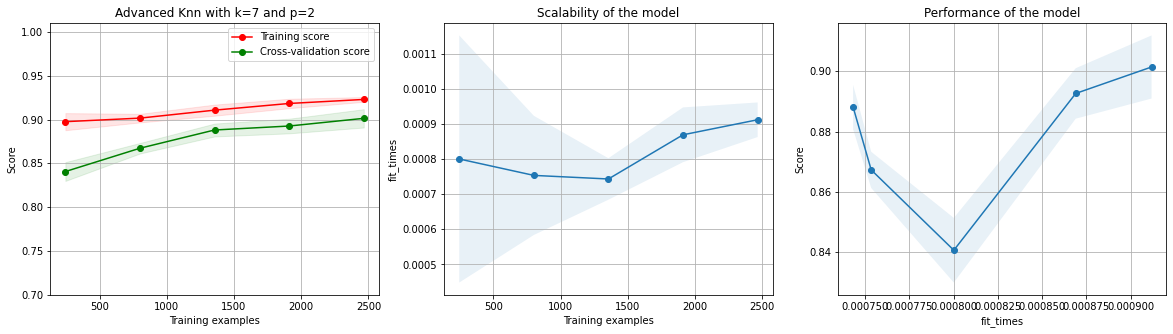

In [68]:
title = f"Advanced Knn with k={k} and p={p}"
plot_learning_curve(
    knn_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [69]:
y_pred_knn_adv_train = cross_val_predict(knn_adv, X_train, y_train, cv=5)
y_pred_knn_adv_test = cross_val_predict(knn_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_knn_adv_train)
precision_train = precision_score(y_train, y_pred_knn_adv_train)
recall_train = recall_score(y_train, y_pred_knn_adv_train)
f1_train = f1_score(y_train, y_pred_knn_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_knn_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_knn_adv_test)
precision_test = precision_score(y_test, y_pred_knn_adv_test)
recall_test = recall_score(y_test, y_pred_knn_adv_test)
f1_test = f1_score(y_test, y_pred_knn_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_knn_adv_test)

print(f"Train Accuracy of Adv KNN k={k}, p={p}: {accuracy_train:.3f}")
print(f"Train Precision of Adv KNN k={k}, p={p}: {precision_train:.3f}")
print(f"Train Recall of Adv KNN k={k}, p={p}: {recall_train:.3f}")
print(f"Train F1 of Adv KNN k={k}, p={p}: {f1_train:.3f}")
print(f"Train ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Adv KNN k={k}, p={p}: {accuracy_test:.3f}")
print(f"Test Precision of Adv KNN k={k}, p={p}: {precision_test:.3f}")
print(f"Test Recall of Adv KNN k={k}, p={p}: {recall_test:.3f}")
print(f"Test F1 of Adv KNN k={k}, p={p}: {f1_test:.3f}")
print(f"Test ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_test:.3f}")

Train Accuracy of Adv KNN k=7, p=2: 0.901
Train Precision of Adv KNN k=7, p=2: 0.897
Train Recall of Adv KNN k=7, p=2: 0.838
Train F1 of Adv KNN k=7, p=2: 0.867
Train ROC AUC of Adv KNN k=7, p=2: 0.889
---
Test Accuracy of Adv KNN k=7, p=2: 0.881
Test Precision of Adv KNN k=7, p=2: 0.884
Test Recall of Adv KNN k=7, p=2: 0.821
Test F1 of Adv KNN k=7, p=2: 0.852
Test ROC AUC of Adv KNN k=7, p=2: 0.872


In [70]:
y_pred_base_knn_train_f = knn_base.predict(X_train)
y_pred_adv_knn_train_f = knn_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_knn_train_f)
precision_base_train = precision_score(y_train, y_pred_base_knn_train_f)
recall_base_train = recall_score(y_train, y_pred_base_knn_train_f)
f1_base_train = f1_score(y_train, y_pred_base_knn_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_knn_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_knn_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_knn_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_knn_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_knn_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_knn_train_f)

y_pred_base_knn_test_f = knn_base.predict(X_test)
y_pred_adv_knn_test_f = knn_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_knn_test_f)
precision_base_test = precision_score(y_test, y_pred_base_knn_test_f)
recall_base_test = recall_score(y_test, y_pred_base_knn_test_f)
f1_base_test = f1_score(y_test, y_pred_base_knn_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_knn_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_knn_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_knn_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_knn_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_knn_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_knn_test_f)

In [71]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base KNN: {accuracy_base_train:.3f}")
print(f"Train Precision of Base KNN: {precision_base_train:.3f}")
print(f"Train Recall of Base KNN: {recall_base_train:.3f}")
print(f"Train F1 of Base KNN: {f1_base_train:.3f}")
print(f"Train ROC of Base KNN: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv KNN: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv KNN: {precision_adv_train:.3f}")
print(f"Train Recall of Adv KNN: {recall_adv_train:.3f}")
print(f"Train F1 of Adv KNN: {f1_adv_train:.3f}")
print(f"Train ROC of Adv KNN: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base KNN: {accuracy_base_test:.3f}")
print(f"Test Precision of Base KNN: {precision_base_test:.3f}")
print(f"Test Recall of Base KNN: {recall_base_test:.3f}")
print(f"Test F1 of Base KNN: {f1_base_test:.3f}")
print(f"Test ROC of Base KNN: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv KNN: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv KNN: {precision_adv_test:.3f}")
print(f"Test Recall of Adv KNN: {recall_adv_test:.3f}")
print(f"Test F1 of Adv KNN: {f1_adv_test:.3f}")
print(f"Test ROC of Adv KNN: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base KNN: 0.943
Train Precision of Base KNN: 0.929
Train Recall of Base KNN: 0.921
Train F1 of Base KNN: 0.925
Train ROC of Base KNN: 0.939
-
Train Accuracy of Adv KNN: 0.926
Train Precision of Adv KNN: 0.923
Train Recall of Adv KNN: 0.879
Train F1 of Adv KNN: 0.901
Train ROC of Adv KNN: 0.917
---
Test Accuracy of Base KNN: 0.895
Test Precision of Base KNN: 0.887
Test Recall of Base KNN: 0.858
Test F1 of Base KNN: 0.872
Test ROC of Base KNN: 0.890
-
Test Accuracy of Adv KNN: 0.906
Test Precision of Adv KNN: 0.914
Test Recall of Adv KNN: 0.855
Test F1 of Adv KNN: 0.883
Test ROC of Adv KNN: 0.899


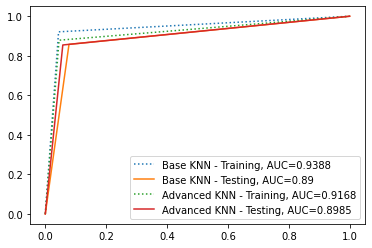

In [72]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_knn_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_knn_train_f), 4)
plt.plot(fpr,tpr,label="Base KNN - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_knn_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_knn_test_f), 4)
plt.plot(fpr,tpr,label="Base KNN - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_knn_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_knn_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced KNN - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_knn_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_knn_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced KNN - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()